# 시계열 분석

## 4장. WMA (Weighted Moving Average) 모델
- 최근 데이터에 큰 weight를 주고 오래된 데이터에 작은 weight를 주는 방법
- .ewm(span=) 이용하여 평균을 구해서 데이터 예측
- SWM 보다는 최신트렌드를 더 잘 따라가며, missingdata도 생기지 않는다.
- 하지만 참고할 데이터가 기준을 충족해야 좋은 데이터예측이 된다.
    - 즉, 앞부분의 예측력은 떨어질 수 밖에 없음

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

---
---

## 01. 데이터 불러오기

In [2]:
airline = pd.read_csv('./data/airline_passengers.csv', index_col = 'Month', parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


---

## 02. WMA
- ewm 사용


In [6]:
# 12개월, 6개월 따로 만들어주기
airline['WMA12'] = \
airline['Thousands of Passengers'].ewm(span=12).mean()
airline['WMA6'] = \
airline['Thousands of Passengers'].ewm(span=6).mean()
airline.head()

,Thousands of Passengers,WMA12,WMA6
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,115.250000,115.500000
1949-03-01,132,121.787529,122.917431
1949-04-01,129,124.064224,125.266892
1949-05-01,121,123.231685,123.769332


<AxesSubplot:xlabel='Month'>

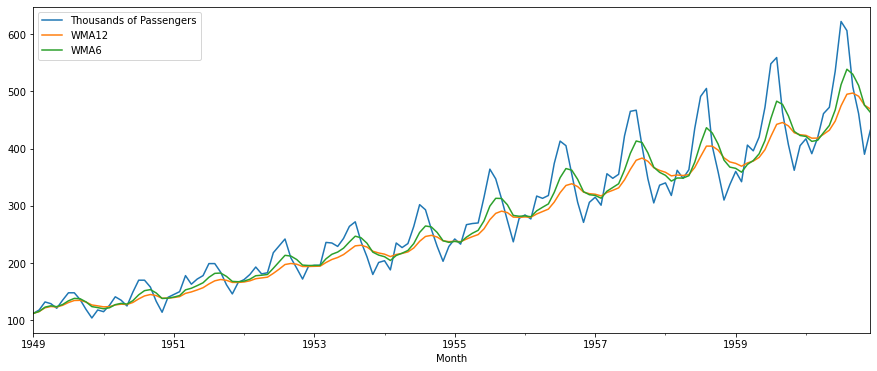

In [5]:
# 그래프로 확인
airline[['Thousands of Passengers','WMA12','WMA6']].plot(figsize=(15,6))

## SMA보다는 뒤로 덜 밀린다.(최신데이터 반영하기때문에 뒤늦게 따라가는 듯한 느낌 없음. )

In [8]:
# 모델평가
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(airline['Thousands of Passengers'],airline['WMA12'])))
print(np.sqrt(mean_squared_error(airline['Thousands of Passengers'],airline['WMA6'])))

41.312675718459396
32.825310766356665
